In [ ]:
!pip install tensorflow pandas scikit-learn


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_csv('/content/phishing_email.csv')

df.head()


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
print(df['Email Text'].isnull().sum())

16


In [7]:
df['Email Text'] = df['Email Text'].fillna('')

In [8]:
df['Email Text'] = df['Email Text'].astype(str)

In [9]:
# Tokenize the email texts
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Email Text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['Email Text'])

# Pad the sequences so that all have the same length
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['Email Type'])


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (14920, 100)
Test set shape: (3730, 100)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))  # Embedding layer to convert words to dense vectors
model.add(LSTM(128, return_sequences=False))  # LSTM layer to process sequences
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.2))  # Another Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 73s 296ms/step - accuracy: 0.8200 - loss: 0.3535 - val_accuracy: 0.9566 - val_loss: 0.1246
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 80s 289ms/step - accuracy: 0.9692 - loss: 0.0824 - val_accuracy: 0.9563 - val_loss: 0.1198
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 80s 281ms/step - accuracy: 0.9766 - loss: 0.0612 - val_accuracy: 0.9584 - val_loss: 0.1183
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 67s 286ms/step - accuracy: 0.9767 - loss: 0.0548 - val_accuracy: 0.9507 - val_loss: 0.1688
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 80s 278ms/step - accuracy: 0.9726 - loss: 0.0734 - val_accuracy: 0.9590 - val_loss: 0.1316


In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 for Safe Email, 1 for Phishing Email)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step
Test Accuracy: 0.9590
                precision    recall  f1-score   support

Phishing Email       0.93      0.96      0.95      1457
    Safe Email       0.98      0.96      0.97      2273

      accuracy                           0.96      3730
     macro avg       0.95      0.96      0.96      3730
  weighted avg       0.96      0.96      0.96      3730



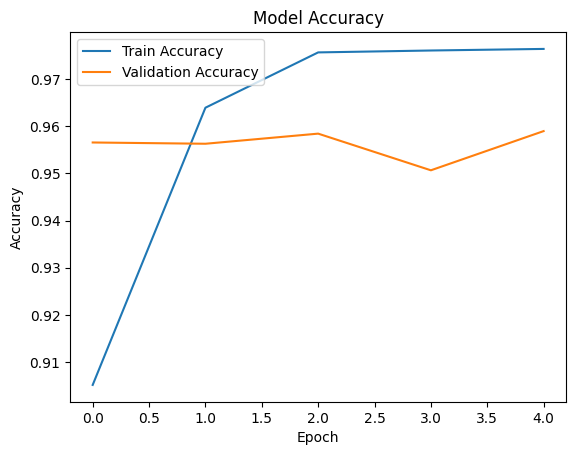

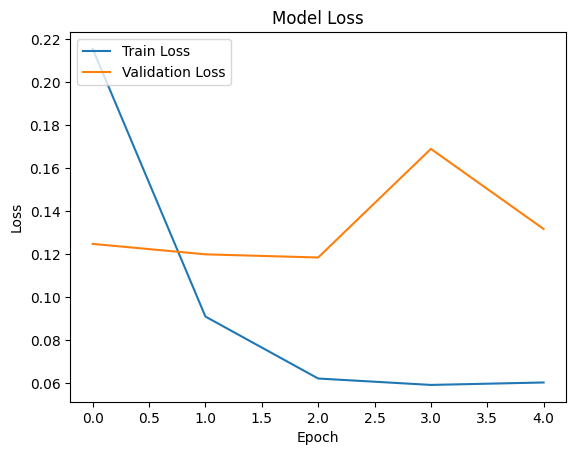

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
